In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'../raw_data\raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [33]:
import pandas as pd
from datetime import datetime  # Ensure datetime is imported properly

# Function to parse and standardize dates
# Function to parse and standardize dates
def parse_dates(date_str):
    try:
        # First, try to parse the ISO 8601 format with timezone (e.g., 2020-05-26 04:30:07-04:00)
        date_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S%z")
        return date_obj.strftime('%Y-%m-%d')  # Only return month/day/year
    except ValueError:
        try:
            # Then, try parsing the format with no time zone (e.g., 5/22/2020 0:00 or 2020-05-21 00:00:00)
            date_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
            return date_obj.strftime('%Y-%m-%d')  # Only return month/day/year
        except ValueError:
            try:
                # Then, try parsing the format without time and in the m/d/Y format (e.g., 5/22/2020 0:00)
                date_obj = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
                return date_obj.strftime('%Y-%m-%d')  # Only return month/day/year
            except ValueError:
                print(f"Unrecognized date format: {date_str}")
                return None


# File paths
input_file = r'../raw_data\raw_analyst_ratings.csv'  # Replace with your actual file path
output_file = '../raw_data/raw_analyst_rating_Date_Formated.csv'

# Read the CSV
df = pd.read_csv(input_file)

# Ensure the column name exists
date_column = 'date'
if date_column not in df.columns:
    raise ValueError(f"Column '{date_column}' not found in the CSV file.")

# Apply the parsing function to standardize dates
df[date_column] = df[date_column].apply(parse_dates)

# Drop rows where dates couldn't be parsed
df = df.dropna(subset=[date_column])

# Save to new CSV file
df.to_csv(output_file, index=False)

print(f"Standardized dates saved to {output_file}")



Standardized dates saved to ../raw_data/raw_analyst_rating_Date_Formated.csv


In [34]:
# 2. Count the number of articles per publisher

file_path = r'../raw_data\raw_analyst_rating_Date_Formated.csv'
df = pd.read_csv(file_path)

articles_per_publisher = df['publisher'].value_counts()

# Display the number of articles per publisher
print("Articles Per Publisher:")
print(articles_per_publisher)

# Clean the 'publisher' column by stripping spaces and standardizing capitalization
df['publisher'] = df['publisher'].str.strip().str.lower()

# Count the number of unique publishers
unique_publishers_count = df['publisher'].nunique()

# Display the number of unique publishers
print(f"Number of unique publishers: {unique_publishers_count}")

Articles Per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64
Number of unique publishers: 1034


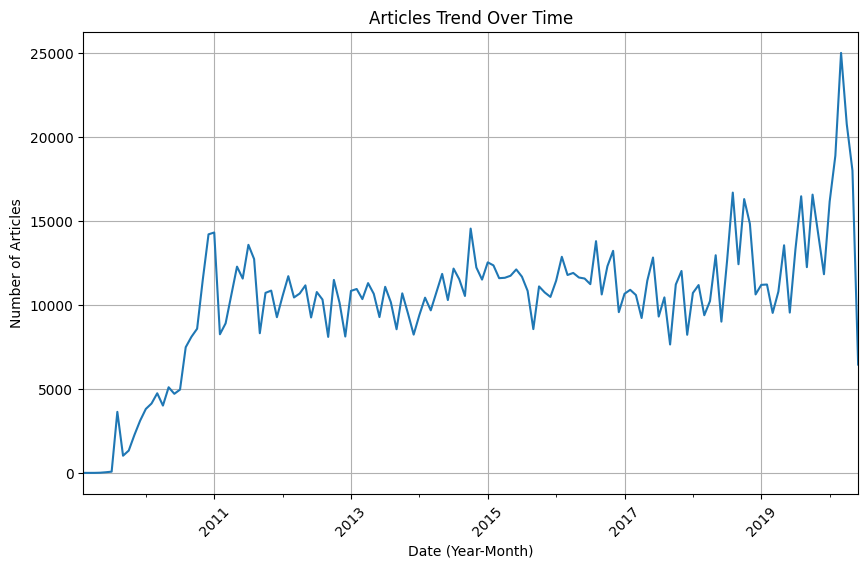

In [35]:
# 3. Analyze the publication dates to see trends over time
# Assuming there is a 'publication_date' column in the dataset
# Convert 'publication_date' to datetime if not already in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the year and month from the publication date
df['year_month'] = df['date'].dt.to_period('M')

# Count the number of articles per month
articles_per_month = df.groupby('year_month').size()

# Plot the trend over time
plt.figure(figsize=(10, 6))
articles_per_month.plot(kind='line')
plt.title('Articles Trend Over Time')
plt.ylabel('Number of Articles')
plt.xlabel('Date (Year-Month)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

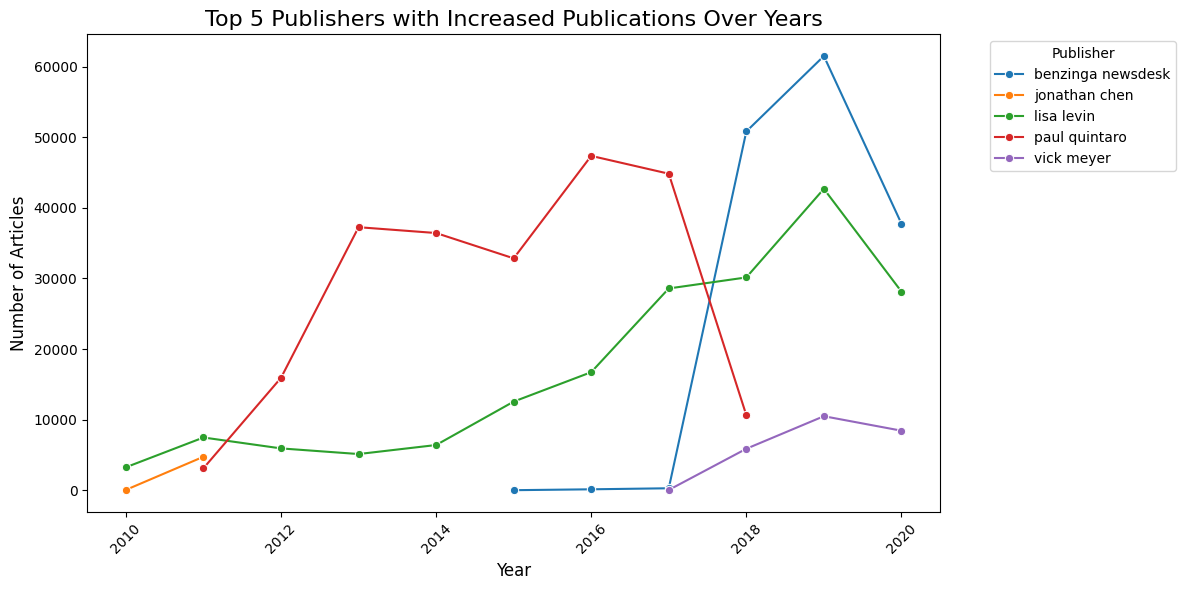

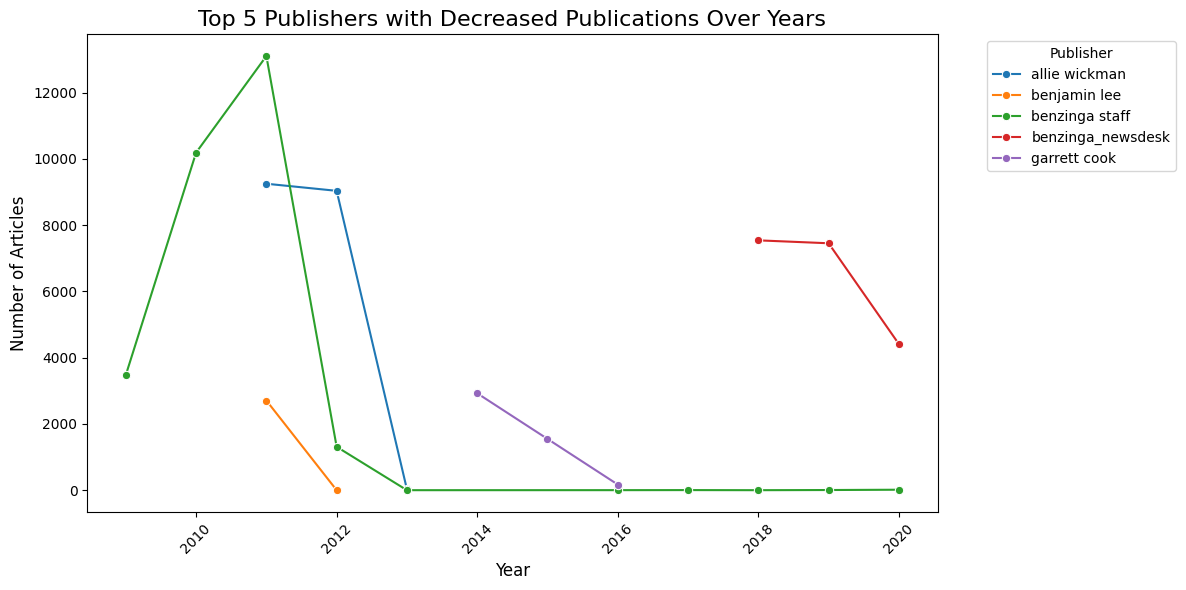

Top 5 publishers with increased publications: ['benzinga newsdesk' 'lisa levin' 'vick meyer' 'paul quintaro'
 'jonathan chen']
Top 5 publishers with decreased publications: ['allie wickman' 'benzinga staff' 'benzinga_newsdesk' 'garrett cook'
 'benjamin lee']


In [36]:
# Clean the 'publisher' column by stripping spaces and standardizing capitalization
df['publisher'] = df['publisher'].str.strip().str.lower()

# Convert the 'publication_date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the year from the 'publication_date'
df['year'] = df['date'].dt.year

# Group by publisher and year, counting the number of articles published per publisher per year
articles_per_publisher_per_year = df.groupby(['publisher', 'year']).size().reset_index(name='article_count')

# Calculate the difference in article counts between consecutive years for each publisher
articles_per_publisher_per_year['article_count_diff'] = articles_per_publisher_per_year.groupby('publisher')['article_count'].diff()

# Calculate the total change in article counts for each publisher
total_change_per_publisher = articles_per_publisher_per_year.groupby('publisher')['article_count_diff'].sum().reset_index()

# Identify top 5 publishers with the highest increase in publications
top_5_increased_publishers = total_change_per_publisher.nlargest(5, 'article_count_diff')

# Identify top 5 publishers with the highest decrease in publications
top_5_decreased_publishers = total_change_per_publisher.nsmallest(5, 'article_count_diff')

# Plot the top 5 increased publishers over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=articles_per_publisher_per_year[articles_per_publisher_per_year['publisher'].isin(top_5_increased_publishers['publisher'])],
             x='year', y='article_count', hue='publisher', marker='o')
plt.title('Top 5 Publishers with Increased Publications Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot the top 5 decreased publishers over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=articles_per_publisher_per_year[articles_per_publisher_per_year['publisher'].isin(top_5_decreased_publishers['publisher'])],
             x='year', y='article_count', hue='publisher', marker='o')
plt.title('Top 5 Publishers with Decreased Publications Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the results
print(f"Top 5 publishers with increased publications: {top_5_increased_publishers['publisher'].values}")
print(f"Top 5 publishers with decreased publications: {top_5_decreased_publishers['publisher'].values}")
